## **Importing Libraries and Datasets**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [33]:
df1 = pd.read_csv('/content/ev_charger_dataset.csv')
df1.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [48]:
df2 = pd.read_excel('/content/ev_charging_station_dataset.xlsx')
df2.head()

,State/UT,EV Charging Facility
0,Andhra Pradesh,65
1,Arunachal Pradesh,4
2,Assam,19
3,Bihar,26
4,Chandigarh,4


In [55]:
df3 = pd.read_excel('/content/ev_market_india_dataset.xlsx')
df3.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


## **Performing EDA**

In [19]:
print('df1 shape: ' ,df1.shape)
print('df2 shape: ' ,df2.shape)
print('df3 shape: ' ,df3.shape)

df1 shape:  (24, 6)
df2 shape:  (31, 2)
df3 shape:  (103, 14)


In [14]:
print('df1 info')
df1.info()

df1 info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [20]:
print('df2 info')
df2.info()

df2 info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State/UT              31 non-null     object
 1   EV Charging Facility  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 628.0+ bytes


In [16]:
print('df3 info')
df3.info()

df3 info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


In [23]:
# statistical summmary of datasets
df1 = df1.describe()
df2 = df2.describe()
df3 = df3.describe()
display('Dataset 1 ', df1, 'Dataset 2', df2, 'Dataset 3', df3)

'Dataset 1 '

,2W,3W,4W,Bus,Chargers
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,9080.746185,7493.232203,417.465287,39.846416,103.395692
std,12771.040642,14594.667177,625.959617,67.180341,102.853288
min,24.000000,24.000000,12.000000,0.000000,10.000000
25%,682.750000,443.062500,32.062500,0.000000,24.750000
50%,5694.479167,1795.125000,231.520833,14.750000,82.061935
75%,10758.877786,5102.547740,444.732657,37.317833,125.156250
max,38558.000000,42881.000000,1895.000000,197.000000,317.000000


'Dataset 2'

,EV Charging Facility
count,8.000000
mean,52.227130
std,55.784488
min,1.000000
25%,20.500000
50%,40.274194
75%,58.451488
max,174.000000


'Dataset 3'

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,19.914193,171.095901,327.850107,156.216486,389.527637,16.584916,58700.966048
std,34.156523,108.071870,285.207777,74.848313,271.885619,34.971430,66310.154739
min,2.100000,43.573030,95.000000,29.566839,103.000000,0.795834,103.000000
25%,4.579358,118.000000,120.260833,103.750000,195.461940,4.162621,30633.248960
50%,7.348058,155.000000,294.393204,174.000000,350.000000,5.000000,39714.750000
75%,12.350000,184.395631,355.000000,192.623786,471.953883,5.500000,58108.672330
max,103.000000,410.000000,970.000000,273.000000,940.000000,103.000000,215000.000000


### **Analysis of EVs**

**Analysis of 2W EVs**

Observation: Maharashtra has the highest number of 2W EVs and J&K has the least number of 2W EVs

<ipython-input-39-6a181d15e867>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2W', y='Region', data = df1, palette = 'magma')


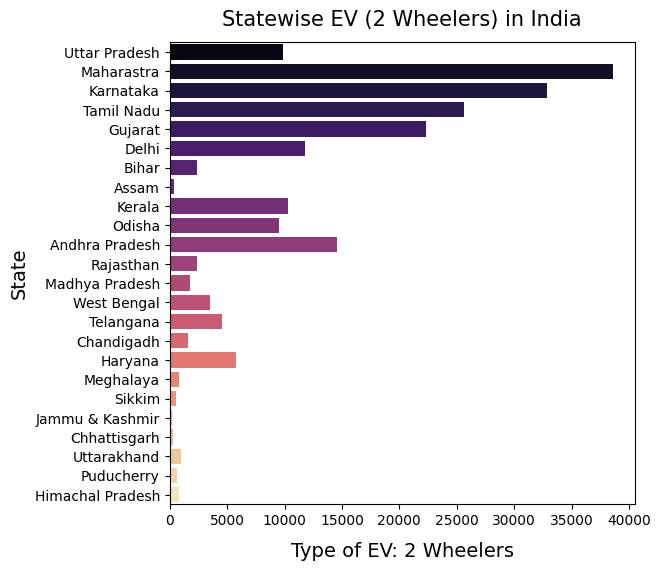

In [39]:
# Analysis of 2 Wheeler EVs
plt.figure(figsize= (6,6))
sns.barplot(x='2W', y='Region', data = df1, palette = 'magma')
plt.ylabel('State', fontsize=14)
plt.xlabel('Type of EV: 2 Wheelers', fontsize=14, labelpad=10)
plt.title(label='Statewise EV (2 Wheelers) in India', weight=200, size=15, pad=12)
plt.show()

**Analysis of 3W EVs**

Observation: Uttar Pradesh has highest number of 3W 3Vs and J&K has the least.

<ipython-input-41-d40af689e7b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='3W', y='Region', data = df1, palette = 'magma')


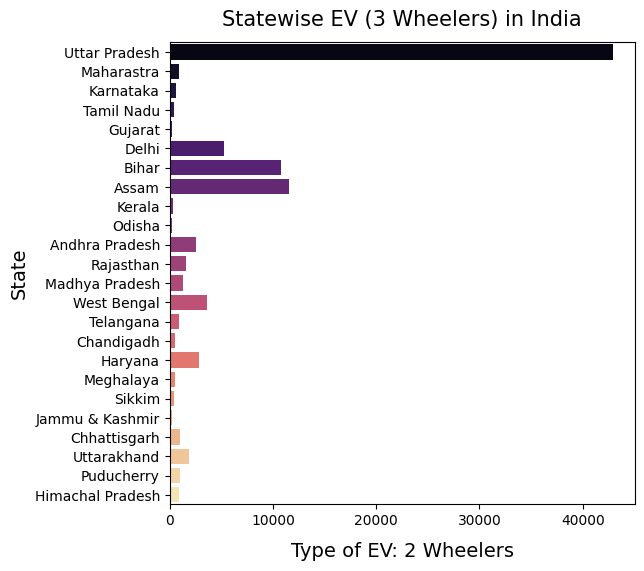

In [41]:
# Analysis of 3 Wheeler EVs
plt.figure(figsize= (6,6))
sns.barplot(x='3W', y='Region', data = df1, palette = 'magma')
plt.ylabel('State', fontsize=14)
plt.xlabel('Type of EV: 2 Wheelers', fontsize=14, labelpad=10)
plt.title(label='Statewise EV (3 Wheelers) in India', weight=200, size=15, pad=12)
plt.show()

**Analysis of 4W EVs**

Observation: Maharashtra has highest number of 4W 3Vs and Sikkim has the least.

<ipython-input-43-c95a22514f80>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='4W', y='Region', data = df1, palette = 'magma')


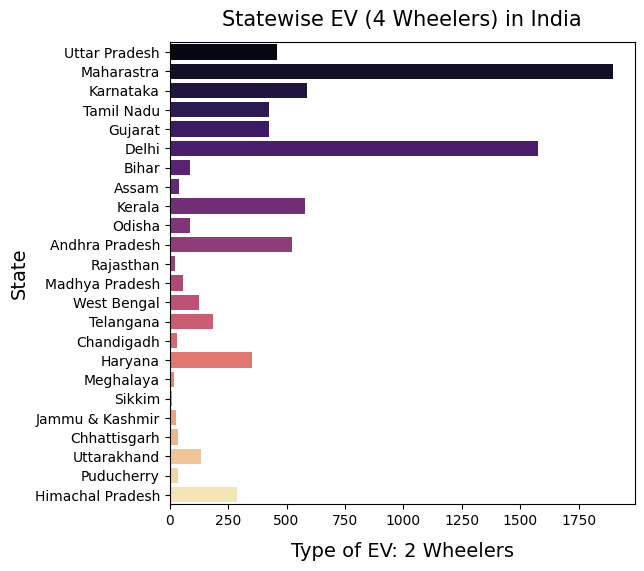

In [43]:
# Analysis of 4 Wheeler EVs
plt.figure(figsize= (6,6))
sns.barplot(x='4W', y='Region', data = df1, palette = 'magma')
plt.ylabel('State', fontsize=14)
plt.xlabel('Type of EV: 2 Wheelers', fontsize=14, labelpad=10)
plt.title(label='Statewise EV (4 Wheelers) in India', weight=200, size=15, pad=12)
plt.show()

###**Analysis of Charging Stations**

<ipython-input-45-a1ea07f88bf3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Chargers', y='Region', data = df1, palette = 'magma')


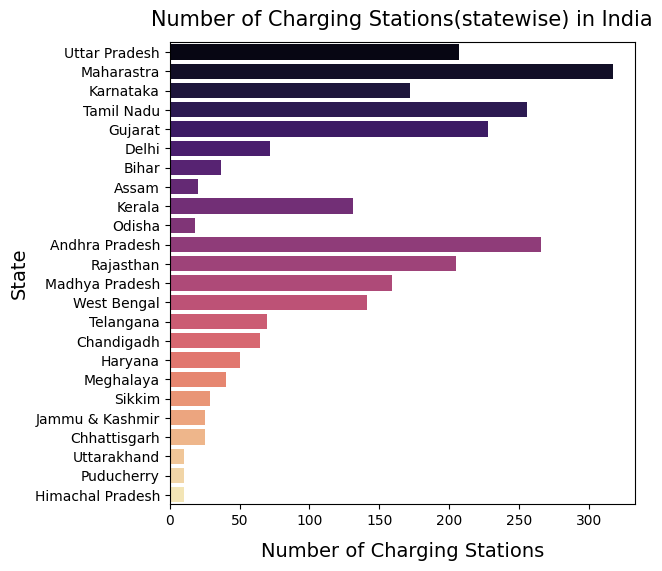

In [45]:
plt.figure(figsize= (6,6))
sns.barplot(x='Chargers', y='Region', data = df1, palette = 'magma')
plt.ylabel('State', fontsize=14)
plt.xlabel('Number of Charging Stations', fontsize=14, labelpad=10)
plt.title(label='Number of Charging Stations(statewise) in India', weight=200, size=15, pad=12)
plt.show()

### **Analysis of Charging Facility for EV**

<ipython-input-49-fdeb998d36e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EV Charging Facility', y='State/UT', data = df2, palette = 'magma')


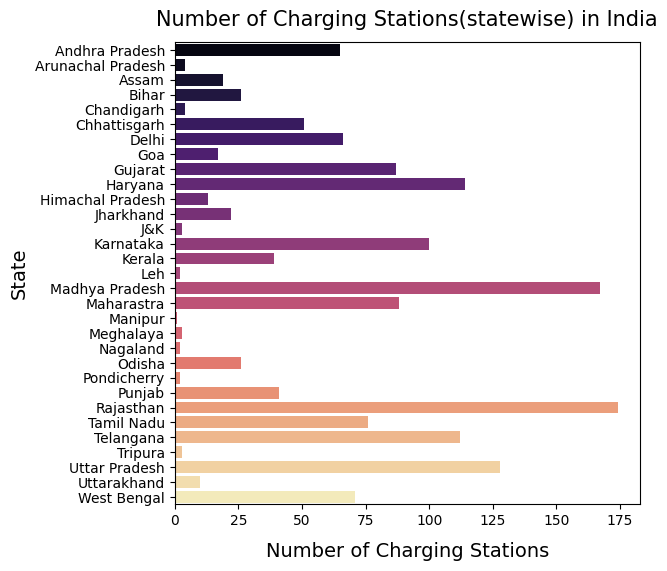

In [49]:
plt.figure(figsize= (6,6))
sns.barplot(x='EV Charging Facility', y='State/UT', data = df2, palette = 'magma')
plt.ylabel('State', fontsize=14)
plt.xlabel('Number of Charging Stations', fontsize=14, labelpad=10)
plt.title(label='Number of Charging Stations(statewise) in India', weight=200, size=15, pad=12)
plt.show()

### **Anaysis of different body style of EVs**

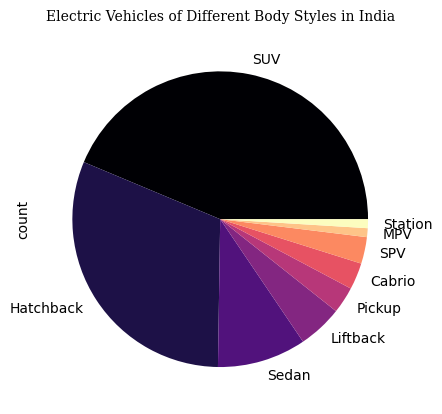

In [72]:
x = df3['BodyStyle'].value_counts().plot.pie(radius=1, cmap='magma', startangle=0)
plt.title(label='Electric Vehicles of Different Body Styles in India', family='serif', size=10, pad=10)
plt.show()

### **Analysis of different number of seats in EVs**

<ipython-input-73-15586bd119dd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df3, x='Seats', palette='viridis')


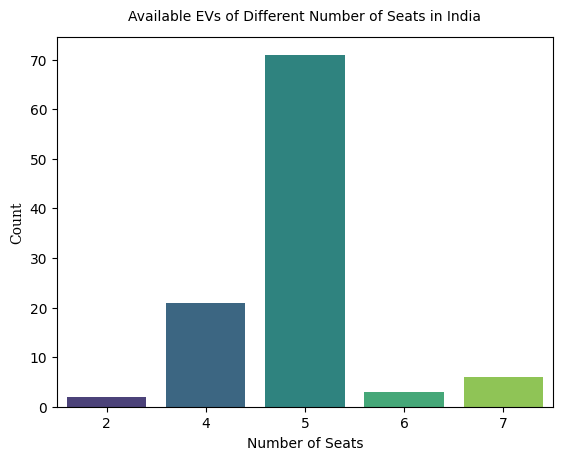

In [73]:
sns.countplot(data=df3, x='Seats', palette='viridis')
plt.xlabel('Number of Seats', size=10)
plt.ylabel('Count', family='serif', size=10)
plt.title(label='Available EVs of Different Number of Seats in India', size=10, pad=12)
plt.show()

### **Analysis of prices of EV**

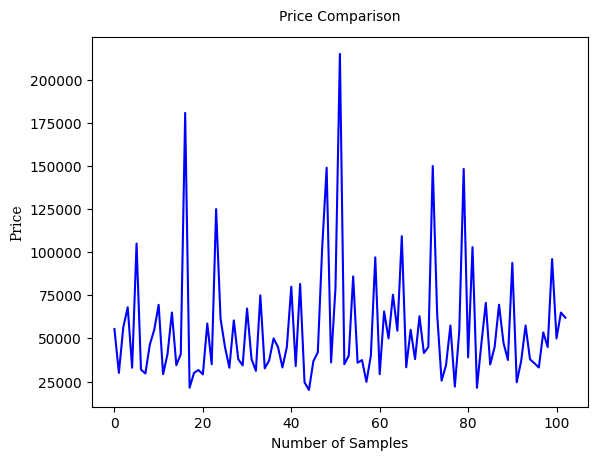

In [75]:
plt.plot(df3['PriceEuro'], color='blue')
plt.xlabel('Number of Samples', size=10)
plt.ylabel('Price', family='serif', size=10)
plt.title('Price Comparison', size=10, pad=12);

### **Analysis of EVs based on speed**

<ipython-input-81-bafe4f13b470>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df3, x='TopSpeed_KmH', y='Brand', ci=None, palette='magma')
<ipython-input-81-bafe4f13b470>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df3, x='TopSpeed_KmH', y='Brand', ci=None, palette='magma')


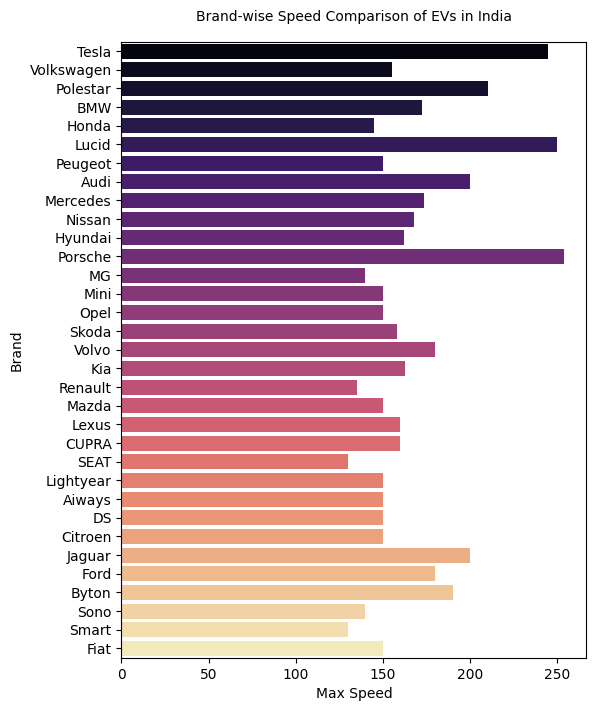

In [81]:
plt.figure(figsize=(6, 8))
sns.barplot(data=df3, x='TopSpeed_KmH', y='Brand', ci=None, palette='magma')
plt.xlabel('Max Speed', size=10)
plt.ylabel('Brand', size=10)
plt.title(label='Brand-wise Speed Comparison of EVs in India', size=10, pad=15)
plt.show()

## **Preprocessing data**

In [83]:
df1.isnull().sum()

,0
Region,0
2W,0
3W,0
4W,0
Bus,0
Chargers,0


In [85]:
df2.isnull().sum()

,0
State/UT,0
EV Charging Facility,0


In [86]:
df3.isnull().sum()

,0
Brand,0
Model,0
AccelSec,0
TopSpeed_KmH,0
Range_Km,0
Efficiency_WhKm,0
FastCharge_KmH,0
RapidCharge,0
PowerTrain,0
PlugType,0


In [87]:
# Encoding the categorical data
df3['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)
df3['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

<ipython-input-87-f514a48ba9c9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)
<ipython-input-87-f514a48ba9c9>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['PowerTrain'].replace(to_replace=['RWD','FWD','

In [88]:
# Feature Selection for Model
X = df3[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

In [89]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [90]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,0.396662
1,-2.322483,-0.345449,-0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,0.181867
2,1.587851,0.008899,0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,0.202775
3,0.291018,-0.000150,0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,-0.261663
4,-2.602679,-0.626489,0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,0.049904


### **Model Building**

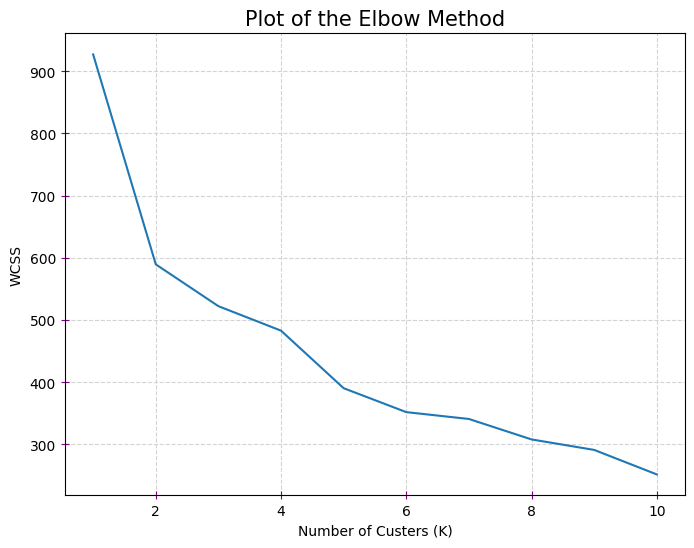

In [93]:
wcss = []
for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Custers (K)')
plt.ylabel('WCSS')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [94]:
# Model Training
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=4, random_state=90)

In [95]:
print(kmean.labels_)

[1 3 1 0 3 1 3 2 0 1 1 2 2 0 3 0 1 3 3 2 2 1 2 1 1 0 0 1 3 3 1 2 2 1 2 2 2
 0 3 2 1 2 1 3 3 2 2 1 2 2 1 1 2 0 1 3 2 3 2 1 3 1 0 1 0 1 2 1 3 1 2 2 1 1
 2 2 1 3 1 1 0 1 3 0 0 2 0 1 1 0 1 3 2 1 2 0 2 0 2 1 1 1 1]


In [96]:
df3['clusters'] = kmean.labels_

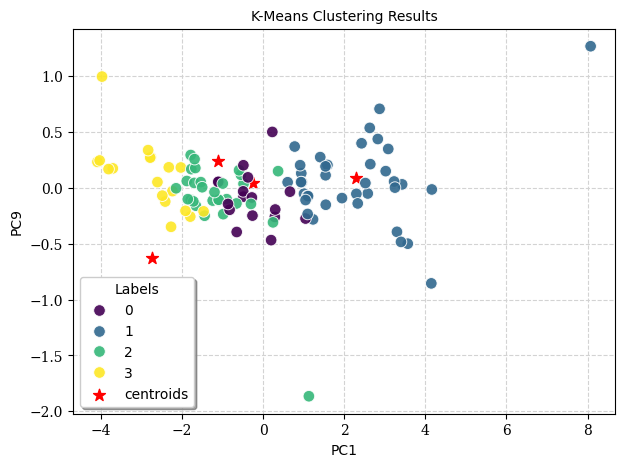

In [97]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1',size=10)
plt.ylabel('PC9', size=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', size=10)
plt.show()